In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 부산광역시, 합계, 연도, 남자, 여자
pd_data = pd.read_csv('성_및_연령별_1인가구__시군구_20230313213550.csv', encoding='cp949')
np_data = pd_data.to_numpy()
print(np_data)

[['부산광역시' '합계' 2015 164617 197132]
 ['부산광역시' '합계' 2016 168035 204377]
 ['부산광역시' '합계' 2017 176932 211967]
 ['부산광역시' '합계' 2018 183579 220829]
 ['부산광역시' '합계' 2019 191796 231431]
 ['부산광역시' '합계' 2020 206311 248896]
 ['부산광역시' '합계' 2021 222040 265322]]


1. np_data에서 '부산광역시', '합계' 제외, dtype을 np.int64로 지정

2. 2015-2021년까지 남자/여자 1인 가구 평균치

3. 2015-2021년까지 남자/여자 편차

4. 2015-2021년 남/녀 1인 가구 상관도  : 여자 1인 가구 수 증가 --> 남자 1인 가구 수 증가?

5. 2015-2021년 연도별 남/녀 1인 가구 비율   (ex 2015년 남자 164617/(165617+197132))

In [32]:
# np_data에서 '부산광역시', '합계' 제외, dtype을 np.int64로 지정

np_data = np.concatenate((np_data[:,:2],np_data[:,2:].astype(np.int64)),axis=1)
num_data = np_data[:,2:].astype(np.int64)
print(np_data)
print(num_data, num_data.dtype)

[['부산광역시' '합계' 2015 164617 197132]
 ['부산광역시' '합계' 2016 168035 204377]
 ['부산광역시' '합계' 2017 176932 211967]
 ['부산광역시' '합계' 2018 183579 220829]
 ['부산광역시' '합계' 2019 191796 231431]
 ['부산광역시' '합계' 2020 206311 248896]
 ['부산광역시' '합계' 2021 222040 265322]]
[[  2015 164617 197132]
 [  2016 168035 204377]
 [  2017 176932 211967]
 [  2018 183579 220829]
 [  2019 191796 231431]
 [  2020 206311 248896]
 [  2021 222040 265322]] int64


남성 평균치 : 187615.7142857143
여성 평균치 : 225707.7142857143


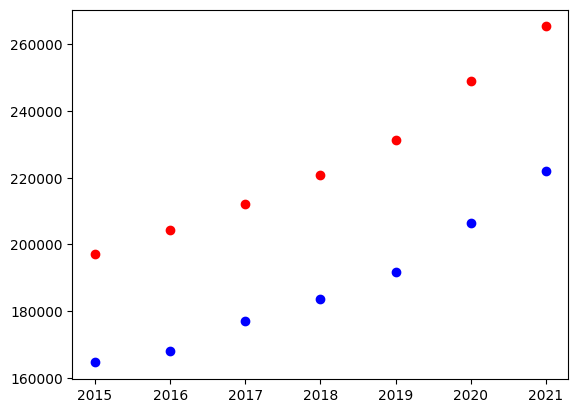

In [33]:
# 평균 구하기

m_num = num_data[:,1]
m_mean = m_num.mean()
print("남성 평균치 :", m_mean)
f_num = num_data[:,2]
f_mean = f_num.mean()
print("여성 평균치 :", f_mean)

_, axe = plt.subplots()
axe.scatter(num_data[:,0], m_num, color="blue")
axe.scatter(num_data[:,0], f_num, color="red")

### total sum of squares

$ SST = \sum_{i=0}^{n}(Y_i - \bar Y)^2 $  : 실제값 - 평균값

### 모 분산

$ s^2 = SST/(n-1) = \sum_{i=0}^{n}(Y_i - \bar Y)^2/(n) $  : (실제값 - 평균값)/(n)    
* 표준 분산의 경우 (실제값 - 평균값)/(n-1)

### 표준 편차
$ s = \sqrt {s^2} $

In [34]:
# 분산 구하기
m_sst = ((m_num - m_mean)**2).sum()
f_sst = ((f_num - f_mean)**2).sum()

m_variance = m_sst/(len(m_num)-1)
f_variance = f_sst/(len(f_num)-1)
print("남성 Variance :", m_variance)
print("여성 Variance :", f_variance)

남성 Variance : 432466997.90476197
여성 Variance : 603987354.5714287


In [35]:
# 편차 구하기
m_deviation = np.sqrt(m_variance)
f_deviation = np.sqrt(f_variance)

print("남성 Deviation :", m_deviation)
print("여성 Deviation :", f_deviation)

남성 Deviation : 20795.84087996352
여성 Deviation : 24576.154185946765


In [36]:
# 검증
m_var = np.var(m_num)*(len(m_num)/(len(m_num)-1))
f_var = np.var(f_num)*(len(f_num)/(len(f_num)-1))

m_std = np.std(m_num)*np.sqrt(len(m_num)/(len(m_num)-1))
f_std = np.std(f_num)*np.sqrt(len(f_num)/(len(f_num)-1))
print("-----------------------검증하기---------------------")
print('남성 분산 비교 :', m_variance, m_var)
print('여성 분산 비교 :', f_variance, f_var)
print("---------------------------------------------------")
print('남성 편차 비교 :', m_deviation, m_std)
print('여성 편차 비교 :', f_deviation, f_std)

-----------------------검증하기---------------------
남성 분산 비교 : 432466997.90476197 432466997.90476197
여성 분산 비교 : 603987354.5714287 603987354.5714287
---------------------------------------------------
남성 편차 비교 : 20795.84087996352 20795.84087996352
여성 편차 비교 : 24576.154185946765 24576.154185946765


### 상관도 구하기

np.corrcoef 활용

피어슨 상관계수(Pearson correlation coefficient) 구하는 함수

$ 피어슨 상관계수 = \frac {공분산} {표준편차_1*표준편차_2} $

In [37]:
# 남/여 상관도 구하기

# 공분산 구하기(/(n-1) 생략 상태)
m_d = np.array(m_num - m_mean)
f_d = np.array(f_num - f_mean)
print((m_d*f_d).sum())
# print(np.dot(m_d, f_d))


# 상관계수 구하기
r = np.dot(m_d, f_d)/((m_std)*(f_std)*(len(m_num)-1))
# r = (m_d*f_d).sum()/((m_std)*(f_std)*(len(m_num)-1))

# 넘파이 모듈 사용 상관계수 구하기
r_m = np.corrcoef(m_num, f_num)

print(r)
print(r_m)

print("-----------------------검증하기---------------------")
print('남/여 상관계수 비교 :', r, r_m[0][1])

3062501237.428571
0.9986989969155926
[[1.       0.998699]
 [0.998699 1.      ]]
-----------------------검증하기---------------------
남/여 상관계수 비교 : 0.9986989969155926 0.9986989969155929


-----------------------기울기 검증---------------------
기울기 비교 : 0.8439792904943922 0.8450787405424048
y절편 : -2876.92227625387


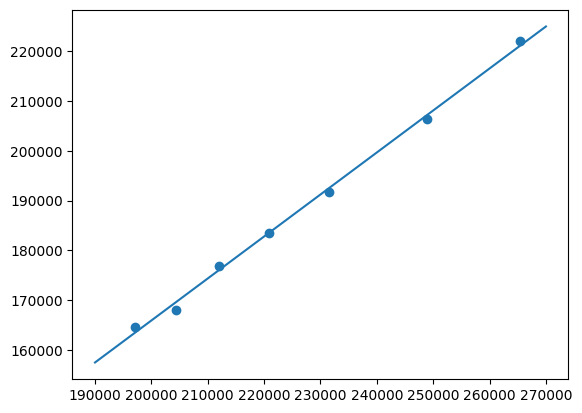

In [38]:
# 회귀선 구하기
# 상관계수 : r, 남성 표준편차 : m_std, 여성 표준편차 : f_std, 남성 평균 : m_mean, 여성 평균 : f_mean

# 영향을 주는 쪽(x) = 여성
# 영향을 받는 쪽(y) = 남성
x = f_num
y = m_num

# y = ax * b
# a : slope (기울기)
# b : intercept (y절편)

# 기울기 구하기
slope = r*(m_d*f_d).sum()/((f_d)**2).sum()
slope_1 = r*m_std/f_std

print("-----------------------기울기 검증---------------------")
print('기울기 비교 :', slope, slope_1)

# y절편 구하기
intercept = m_mean - (slope*f_mean)
print("y절편 :", intercept)

_, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(np.linspace(190000, 270000, 100), slope*np.linspace(190000, 270000,100)+intercept)

In [39]:
# 예측치 구하기
y_pred = slope*x + intercept

# 에러 구하기
err = y - y_pred
print(err)

# SSE : squared sum of err 구하기
print("SSE :", np.sum(err**2))

[ 1118.59678251 -1578.03317712   913.16400803    80.81953567
  -650.04890215  -875.14721064   990.6489637 ]
SSE : 6751679.357602098


In [40]:
# 남성/여성 % 구성 비율
total_num = m_num + f_num
m_per = m_num/total_num
f_per = f_num/total_num
print(np_data[:,2])
print(m_per)
print(f_per)

per_mf = np.vstack((np_data[:,2],m_per,f_per))
print(per_mf)

[2015 2016 2017 2018 2019 2020 2021]
[0.45505862 0.45120727 0.45495617 0.45394503 0.45317525 0.45322458
 0.45559564]
[0.54494138 0.54879273 0.54504383 0.54605497 0.54682475 0.54677542
 0.54440436]
[[2015 2016 2017 2018 2019 2020 2021]
 [0.4550586179920332 0.451207265072017 0.4549561711395504
  0.45394502581551305 0.4531752463807838 0.45322457695070595
  0.4555956352772682]
 [0.5449413820079668 0.548792734927983 0.5450438288604497
  0.546054974184487 0.5468247536192161 0.546775423049294
  0.5444043647227318]]
